In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from scipy import ndimage as di 

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

from sklearn.cluster import MeanShift

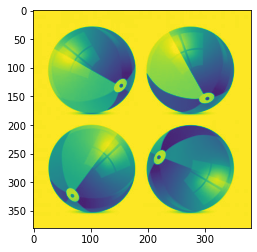

In [2]:
#reading the images for the Lab

image_1 = cv2.imread("ball_set.jpg",0)

#gray = cv2.cvtColor(image_1,cv2.COLOR_BGR2GRAY)
plt.imshow(image_1)


In [3]:
def AssignWaterShed(path):
    
    #Refrences :: This code is refrencing https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html 
    
    #conversion of image to grayscale
    gray = cv2.imread(path,0)

    #preprocessing for adaptive thresholding for the image
    #reducing the noise of the image here
    
    gray = cv2.medianBlur(gray,9)

    
    #using adaptive thresholding for converstion of the image to binary
    b_w = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)

    #computing distace transform of the image
    distance_transform = di.distance_transform_edt(b_w)
    
    coords = peak_local_max(distance_transform, footprint=np.ones((3, 3)), labels=b_w)

    mask = np.zeros(distance_transform.shape, dtype=bool)

    mask[tuple(coords.T)] = True
    
    markers, _ = di.label(mask)

    labels = watershed(-distance_transform, markers, mask=b_w)
    
    return labels
    

In [4]:
def AssignMeanShift(path):
    
    # Refrences :: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html 
    
    #Note :: for faster execution time the size of the image is reduced to 30 percent of the original image.
    
    #reading the image here
    image_2 = cv2.imread(path)
    
    #i am resizing the image for samller execution time of the program
    down_size = 30 # percent of original size
    
    image_width = int(image_2.shape[1] * down_size / 100)
    image_height = int(image_2.shape[0] * down_size/ 100)
    
    #making the dimensions via the tuple of the image
    dim = (image_width, image_height)

    # resize image using cv2 resize method
    image_resize = cv2.resize(image_2, dim, interpolation = cv2.INTER_AREA)

    #changing the image to channels here
    image_red =   image_resize[:,:,0]
    image_green = image_resize[:,:,1]
    image_blue =  image_resize[:,:,2]
    
    
    #flattening the channels now
    red_flatten = image_red.flatten()
    green_flatten = image_green.flatten()
    blue_flatten = image_blue.flatten()
    
    #combining the channels here
    channels = np.array([red_flatten, green_flatten, blue_flatten]).T
    
    
    #clustering via the MeanShift algorithm
    clustering  = MeanShift(bin_seeding=True)
    labels = clustering.fit_predict(channels)
    
    
    #reshaping of the labels
    reshaped_lables = np.reshape(labels,image_red.shape)
    
    return reshaped_lables
    


In [5]:
def display(orig, water, mean):
    
    #Ref :: The code refrence -> https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_watershed.html
    
    fig, axes = plt.subplots(ncols=3, figsize=(12, 3))
    ax = axes.ravel()

    ax[0].imshow(orig)
    ax[0].set_title('Original Image')
    
    ax[1].imshow(water, cmap=plt.cm.nipy_spectral)
    ax[1].set_title('Water Shed')

    ax[2].imshow(mean)
    ax[2].set_title('Mean Shift')

    for a in ax:
        a.set_axis_off()

    fig.tight_layout()
    plt.show()

### Question 1 :: Water Shed Algorithm

In [6]:
labels_question_1 = AssignWaterShed("ball_set.jpg")

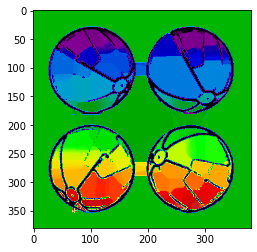

In [7]:
plt.imshow(labels_question_1,cmap=plt.cm.nipy_spectral)

### Question 2 :: MeanShift Algorithm

In [8]:
labels_question_2 = AssignMeanShift("ball_set.jpg")

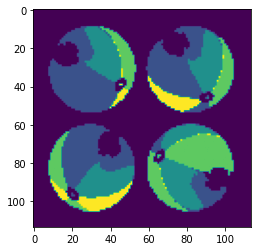

In [9]:
plt.imshow(labels_question_2)

### Question 3 :: Water Shed & MeanShift

#### Instructions 
    1.Provide the path of the file as an argument to the original_image,AssignWaterShed, AssignMeanShift
    2.The image for MeanShift is reduced to 30 percent of the original size.
    3.If you wish to run it against the original image, then please comment the resizing code in the AssignMeanShift method.

In [10]:
#reading the original image
original_image = cv2.imread("planets.jpg")

In [11]:
#running the watershed algorithm for the image
lables_water = AssignWaterShed("planets.jpg")

In [12]:
#running the mean shift algorithm 
lables_mean =  AssignMeanShift("planets.jpg")

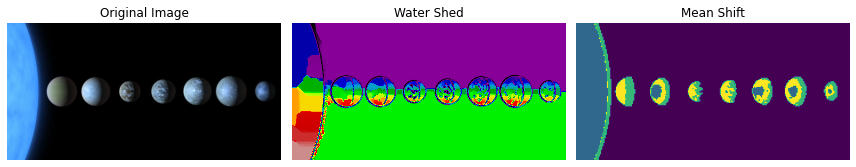

In [13]:
#calling the function to display the images.
display(original_image, lables_water, lables_mean)